## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [5]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [6]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [7]:
x=df.drop('math_score', axis=1)

In [8]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [9]:
y=df.math_score

In [10]:
#Create column transformer with 3 types of transformers
num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
num_transformer=StandardScaler()
oh_transformaer=OneHotEncoder(drop='first')

preprocessor=ColumnTransformer(
    [
        ('StandardScaler', num_transformer, num_features),
        ('OneHotEncoder', oh_transformaer,cat_features)
    ]
)

In [11]:
x=preprocessor.fit_transform(x)

In [12]:
x

array([[ 0.19399858,  0.39149181,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 1.42747598,  1.31326868,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.60515772,  0.58901542,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [13]:
#separate dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((800, 14), (200, 14))

#### Create an Evaluate Function to give all metrics after model Training

In [14]:
def evaluate_model(true, predicted):
    mae=mean_absolute_error(true,predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [15]:
models={
    'Linear Reg': LinearRegression(),
    'Ridge Reg': Ridge(),
    'Lasso Reg':Lasso(),
    'KNN':KNeighborsRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest':RandomForestRegressor(),
    'XgBoost':XGBRegressor(),
    'CatBoosting':CatBoostRegressor(),
    'AdaBoost':AdaBoostRegressor()
}

model_List=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    mae_train, mse_train, rmse_train, r2_train=evaluate_model(y_train,y_train_pred)
    mae_test, mse_test, rmse_test, r2_test=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_List.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(mse_train))
    print("- Root Mean Squared Error: {:.4f}".format(rmse_train))
    print("- Mean Absolute Error: {:.4f}".format(mae_train))
    print("- R2 Score: {:.4f}".format(r2_train))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(mse_test))
    print("- Root Mean Squared Error: {:.4f}".format(rmse_test))
    print("- Mean Absolute Error: {:.4f}".format(mae_test))
    print("- R2 Score: {:.4f}".format(r2_test))
    r2_list.append(r2_test)
    
    print('='*35)
    print('\n')

Linear Reg
Model performance for Training set
- Mean Squared Error: 28.3349
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Mean Squared Error: 29.0952
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Ridge Reg
Model performance for Training set
- Mean Squared Error: 28.3397
- Root Mean Squared Error: 5.3235
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Mean Squared Error: 29.0908
- Root Mean Squared Error: 5.3936
- Mean Absolute Error: 4.2125
- R2 Score: 0.8805


Lasso Reg
Model performance for Training set
- Mean Squared Error: 43.4783
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Mean Squared Error: 42.5063
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R

In [16]:
pd.DataFrame(list(zip(model_List,r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)

,Model Name,R2 Score
1,Ridge Reg,0.880451
0,Linear Reg,0.880433
5,Random Forest,0.850811
7,CatBoosting,0.849801
8,AdaBoost,0.846986
2,Lasso Reg,0.825320
6,XgBoost,0.820924
3,KNN,0.776335
4,Decision Tree,0.721643


## Linear Regression

In [17]:
lin_model=LinearRegression(fit_intercept=True)
lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test, y_pred)
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 0.88


## Plot y_pred and y_test

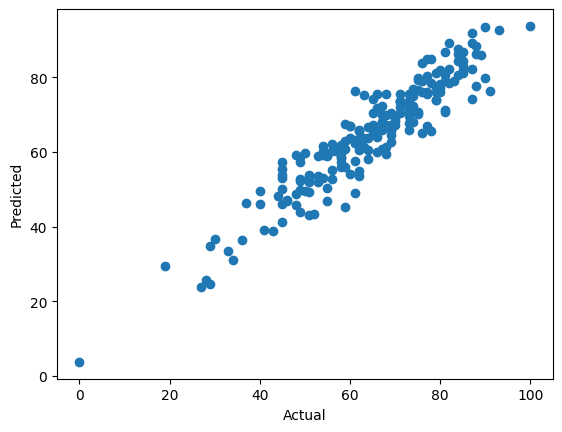

In [19]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<Axes: xlabel='math_score'>

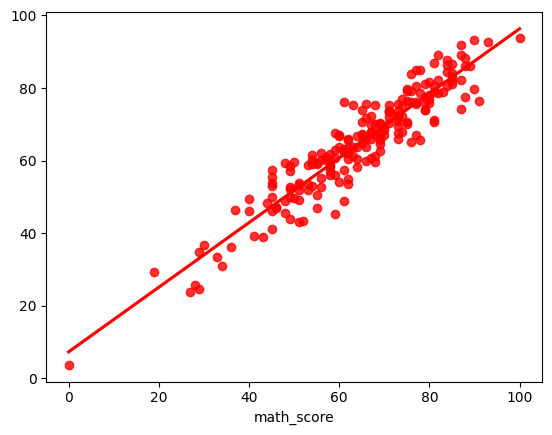

In [20]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='r')

#### Difference between Actual and Predicted Values

In [21]:
pred_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
